# Análisis de Datos de Libros
## Web Scraping y Comparación de Precios

Este notebook analiza los datos extraídos de múltiples fuentes:
- Open Library API
- Google Books API
- Amazon España (Web Scraping)
- Project Gutenberg

In [10]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("✅ Librerías importadas correctamente")

✅ Librerías importadas correctamente


## 1. Carga de Datos

In [13]:
# Cargar los 4 archivos CSV
try:
    df_busquedas = pd.read_csv('libros_busquedas.csv')
    df_precios = pd.read_csv('precios_detallados.csv')
    df_gratuitos = pd.read_csv('libros_gratuitos.csv')
    df_fuentes = pd.read_csv('fuentes_datos.csv')
    
    print(" Archivos cargados exitosamente:")
    print(f"   • Búsquedas: {len(df_busquedas)} registros")
    print(f"   • Precios: {len(df_precios)} registros")
    print(f"   • Gratuitos: {len(df_gratuitos)} registros")
    print(f"   • Fuentes: {len(df_fuentes)} registros")
except FileNotFoundError as e:
    print(f" Error: {e}")
    print("Asegúrate de que los archivos CSV estén en el directorio actual")

✅ Archivos cargados exitosamente:
   • Búsquedas: 3 registros
   • Precios: 15 registros
   • Gratuitos: 5 registros
   • Fuentes: 4 registros


## 2. Exploración Inicial de Datos

In [16]:
# Vista previa de búsquedas
print(" DATASET: Búsquedas de Libros")
print("="*80)
display(df_busquedas.head())
print("\nInformación del DataFrame:")
df_busquedas.info()

📊 DATASET: Búsquedas de Libros


,Busqueda,Fecha,Titulo_OpenLibrary,Autor,Año,ISBN,Categoria,Paginas,Idioma
0,Harry Potter,2026-01-28 18:53:32,Harry Potter and the Deathly Hallows,J. K. Rowling,2007,NaN,NaN,NaN,NaN
1,1984,2026-01-28 18:53:50,1984 (adaptation),Michael Dean,2003,NaN,NaN,NaN,NaN
2,Don Quijote,2026-01-28 18:54:08,Don Quijote de la Mancha,Miguel de Cervantes Saavedra,1600,NaN,NaN,NaN,NaN



Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Busqueda            3 non-null      object 
 1   Fecha               3 non-null      object 
 2   Titulo_OpenLibrary  3 non-null      object 
 3   Autor               3 non-null      object 
 4   Año                 3 non-null      int64  
 5   ISBN                0 non-null      float64
 6   Categoria           0 non-null      float64
 7   Paginas             0 non-null      float64
 8   Idioma              0 non-null      float64
dtypes: float64(4), int64(1), object(4)
memory usage: 348.0+ bytes


In [18]:
# Vista previa de precios
print("\n DATASET: Precios Detallados")
print("="*80)
display(df_precios.head())
print("\nInformación del DataFrame:")
df_precios.info()


💰 DATASET: Precios Detallados


,Busqueda,Tienda,Titulo,Precio,Disponibilidad,Rating,Enlace,Hora_Busqueda
0,Harry Potter,Amazon,Funidelia Disfraz Oficial Harry Potter - Gryff...,34.99€,Disponible,"3,9 de 5 estrellas",NaN,18:53:29
1,Harry Potter,Amazon,PUREMIND Harry Potter Licencia Oficial Puzzle ...,27.99€,Sólo queda(n) 5 en stock.,"5,0 de 5 estrellas",NaN,18:53:29
2,Harry Potter,Amazon,PUREMIND Harry Potter Puzzle 3D de Madera Ofic...,27.99€,Disponible,"4,0 de 5 estrellas",NaN,18:53:29
3,Harry Potter,Amazon,Harry Potter y la piedra filosofal (Harry Pott...,37.95€,Disponible,"4,8 de 5 estrellas",https://www.amazon.es/Harry-Potter-piedra-filo...,18:53:29
4,Harry Potter,Amazon,"Harry Potter Marcapáginas Originales Metal, Ma...",17.06€,Disponible,"4,7 de 5 estrellas",https://www.amazon.es/Harry-Potter-Marcap%C3%A...,18:53:29



Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Busqueda        15 non-null     object
 1   Tienda          15 non-null     object
 2   Titulo          15 non-null     object
 3   Precio          15 non-null     object
 4   Disponibilidad  15 non-null     object
 5   Rating          15 non-null     object
 6   Enlace          2 non-null      object
 7   Hora_Busqueda   15 non-null     object
dtypes: object(8)
memory usage: 1.1+ KB


In [20]:
# Vista previa de libros gratuitos
print("\n DATASET: Libros Gratuitos")
print("="*80)
display(df_gratuitos.head())
print("\nInformación del DataFrame:")
df_gratuitos.info()


🆓 DATASET: Libros Gratuitos


,Titulo,Precio,Formato,Fuente,Enlace
0,The Enchiridion by Epictetus (11057),GRATIS,Digital (varios formatos),Project Gutenberg,https://www.gutenberg.org/ebooks/45109
1,"Frankenstein; Or, The Modern Prometheus by Mar...",GRATIS,Digital (varios formatos),Project Gutenberg,https://www.gutenberg.org/ebooks/84
2,The Philippines: Past and Present (Volume 2 of...,GRATIS,Digital (varios formatos),Project Gutenberg,https://www.gutenberg.org/ebooks/41918
3,"Moby Dick; Or, The Whale by Herman Melville (4...",GRATIS,Digital (varios formatos),Project Gutenberg,https://www.gutenberg.org/ebooks/2701
4,Pride and Prejudice by Jane Austen (3420),GRATIS,Digital (varios formatos),Project Gutenberg,https://www.gutenberg.org/ebooks/1342



Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Titulo   5 non-null      object
 1   Precio   5 non-null      object
 2   Formato  5 non-null      object
 3   Fuente   5 non-null      object
 4   Enlace   5 non-null      object
dtypes: object(5)
memory usage: 332.0+ bytes


## 3. Limpieza y Preprocesamiento de Datos

In [23]:
# Función para limpiar precios (convertir strings a números)
def limpiar_precio(precio_str):
    """Convierte strings de precios a valores numéricos"""
    if pd.isna(precio_str) or precio_str == 'No disponible':
        return np.nan
    
    # Remover símbolos de moneda y convertir
    precio_str = str(precio_str).replace('€', '').replace(',', '.').strip()
    try:
        return float(precio_str)
    except:
        return np.nan

# Aplicar limpieza a precios
df_precios['Precio_num'] = df_precios['Precio'].apply(limpiar_precio)

print(" Precios limpiados y convertidos a numérico")
print(f"   • Precios válidos: {df_precios['Precio_num'].notna().sum()}")
print(f"   • Precios faltantes: {df_precios['Precio_num'].isna().sum()}")

✅ Precios limpiados y convertidos a numérico
   • Precios válidos: 14
   • Precios faltantes: 1


In [25]:
# Limpiar ratings (extraer valor numérico)
def limpiar_rating(rating_str):
    """Extrae el valor numérico del rating"""
    if pd.isna(rating_str) or rating_str == 'Sin valoraciones':
        return np.nan
    
    # Buscar patrón numérico (ej: "4,5 de 5 estrellas")
    import re
    match = re.search(r'(\d+[,.]?\d*)', str(rating_str))
    if match:
        return float(match.group(1).replace(',', '.'))
    return np.nan

df_precios['Rating_num'] = df_precios['Rating'].apply(limpiar_rating)

print(" Ratings limpiados")
print(f"   • Ratings válidos: {df_precios['Rating_num'].notna().sum()}")
print(f"   • Ratings faltantes: {df_precios['Rating_num'].isna().sum()}")

✅ Ratings limpiados
   • Ratings válidos: 15
   • Ratings faltantes: 0


In [29]:
# Limpiar número de páginas
df_busquedas['Paginas'] = pd.to_numeric(df_busquedas['Paginas'], errors='coerce')

# Convertir año a numérico
df_busquedas['Año'] = pd.to_numeric(df_busquedas['Año'], errors='coerce')

print(" Datos numéricos procesados en búsquedas")
print(f"   • Páginas válidas: {df_busquedas['Paginas'].notna().sum()}")
print(f"   • Años válidos: {df_busquedas['Año'].notna().sum()}")

✅ Datos numéricos procesados en búsquedas
   • Páginas válidas: 0
   • Años válidos: 3


## 4. Estadísticas Descriptivas

In [32]:
# Estadísticas de precios
print(" ESTADÍSTICAS DE PRECIOS")
print("="*80)
precios_stats = df_precios['Precio_num'].describe()
print(precios_stats)
print(f"\nPrecio medio: {df_precios['Precio_num'].mean():.2f}€")
print(f"Precio mediano: {df_precios['Precio_num'].median():.2f}€")
print(f"Desviación estándar: {df_precios['Precio_num'].std():.2f}€")
print(f"Rango de precios: {df_precios['Precio_num'].min():.2f}€ - {df_precios['Precio_num'].max():.2f}€")

💰 ESTADÍSTICAS DE PRECIOS
count    14.000000
mean     21.367143
std       8.869284
min       2.990000
25%      16.632500
50%      19.990000
75%      26.905000
max      37.950000
Name: Precio_num, dtype: float64

Precio medio: 21.37€
Precio mediano: 19.99€
Desviación estándar: 8.87€
Rango de precios: 2.99€ - 37.95€


In [34]:
# Estadísticas de páginas
print("\n📖 ESTADÍSTICAS DE PÁGINAS")
print("="*80)
if df_busquedas['Paginas'].notna().sum() > 0:
    paginas_stats = df_busquedas['Paginas'].describe()
    print(paginas_stats)
    print(f"\nPromedio de páginas: {df_busquedas['Paginas'].mean():.0f}")
    print(f"Mediana de páginas: {df_busquedas['Paginas'].median():.0f}")
else:
    print("No hay datos suficientes de páginas")


📖 ESTADÍSTICAS DE PÁGINAS
No hay datos suficientes de páginas


In [36]:
# Estadísticas de ratings
print("\n ESTADÍSTICAS DE RATINGS")
print("="*80)
if df_precios['Rating_num'].notna().sum() > 0:
    ratings_stats = df_precios['Rating_num'].describe()
    print(ratings_stats)
    print(f"\nRating promedio: {df_precios['Rating_num'].mean():.2f}/5")
    print(f"Rating mediano: {df_precios['Rating_num'].median():.2f}/5")
else:
    print("No hay datos suficientes de ratings")


⭐ ESTADÍSTICAS DE RATINGS
count    15.000000
mean      4.673333
std       0.351460
min       3.900000
25%       4.550000
50%       4.700000
75%       5.000000
max       5.000000
Name: Rating_num, dtype: float64

Rating promedio: 4.67/5
Rating mediano: 4.70/5


## 5. Análisis por Categorías

In [39]:
# Análisis de disponibilidad
print(" ANÁLISIS DE DISPONIBILIDAD")
print("="*80)
disponibilidad_counts = df_precios['Disponibilidad'].value_counts()
print(disponibilidad_counts)
print(f"\nPorcentaje disponible: {(disponibilidad_counts.get('Disponible', 0) / len(df_precios) * 100):.1f}%")

📦 ANÁLISIS DE DISPONIBILIDAD
Disponibilidad
Disponible                   14
Sólo queda(n) 5 en stock.     1
Name: count, dtype: int64

Porcentaje disponible: 93.3%


In [41]:
# Análisis de idiomas
print("\n ANÁLISIS DE IDIOMAS")
print("="*80)
idiomas = df_busquedas['Idioma'].value_counts()
print(idiomas)

# Crear gráfico
if len(idiomas) > 0:
    plt.figure(figsize=(10, 6))
    idiomas.plot(kind='bar', color='skyblue')
    plt.title('Distribución de Libros por Idioma', fontsize=16, fontweight='bold')
    plt.xlabel('Idioma')
    plt.ylabel('Cantidad de Libros')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


🌍 ANÁLISIS DE IDIOMAS
Series([], Name: count, dtype: int64)


In [43]:
# Análisis de categorías
print("\n ANÁLISIS DE CATEGORÍAS")
print("="*80)
categorias = df_busquedas['Categoria'].value_counts()
print(categorias)

if len(categorias) > 0:
    plt.figure(figsize=(12, 6))
    categorias.head(10).plot(kind='barh', color='coral')
    plt.title('Top 10 Categorías de Libros', fontsize=16, fontweight='bold')
    plt.xlabel('Cantidad de Libros')
    plt.ylabel('Categoría')
    plt.tight_layout()
    plt.show()


📚 ANÁLISIS DE CATEGORÍAS
Series([], Name: count, dtype: int64)


## 6. Visualizaciones de Precios

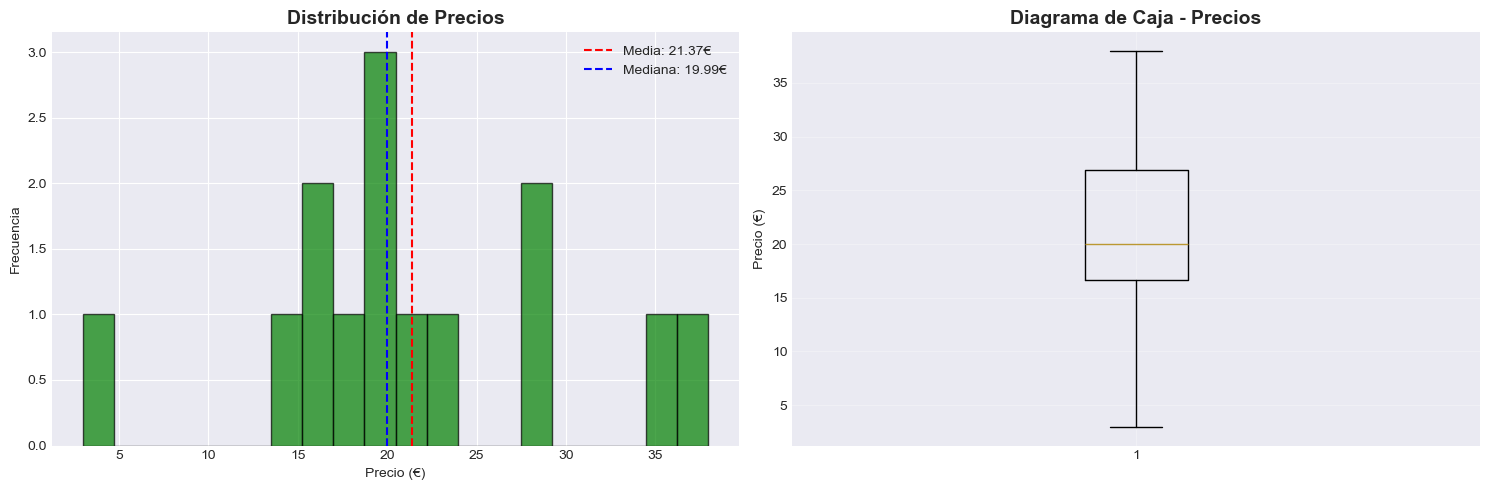

In [46]:
# Histograma de precios
if df_precios['Precio_num'].notna().sum() > 0:
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    # Histograma
    axes[0].hist(df_precios['Precio_num'].dropna(), bins=20, color='green', alpha=0.7, edgecolor='black')
    axes[0].set_title('Distribución de Precios', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Precio (€)')
    axes[0].set_ylabel('Frecuencia')
    axes[0].axvline(df_precios['Precio_num'].mean(), color='red', linestyle='--', label=f'Media: {df_precios["Precio_num"].mean():.2f}€')
    axes[0].axvline(df_precios['Precio_num'].median(), color='blue', linestyle='--', label=f'Mediana: {df_precios["Precio_num"].median():.2f}€')
    axes[0].legend()
    
    # Boxplot
    axes[1].boxplot(df_precios['Precio_num'].dropna(), vert=True)
    axes[1].set_title('Diagrama de Caja - Precios', fontsize=14, fontweight='bold')
    axes[1].set_ylabel('Precio (€)')
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
else:
    print("⚠ No hay suficientes datos de precios para visualizar")

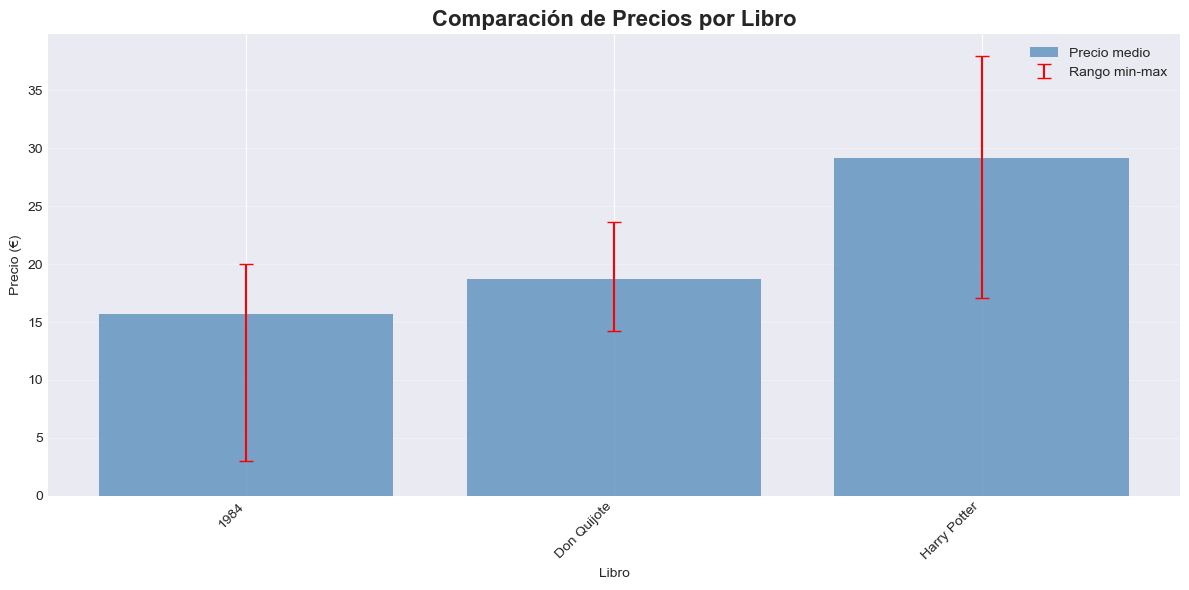

In [48]:
# Comparación de precios por libro buscado
if df_precios['Precio_num'].notna().sum() > 0:
    plt.figure(figsize=(12, 6))
    
    precios_por_busqueda = df_precios.groupby('Busqueda')['Precio_num'].agg(['mean', 'min', 'max'])
    
    x = range(len(precios_por_busqueda))
    plt.bar(x, precios_por_busqueda['mean'], alpha=0.7, label='Precio medio', color='steelblue')
    plt.errorbar(x, precios_por_busqueda['mean'], 
                 yerr=[precios_por_busqueda['mean'] - precios_por_busqueda['min'],
                       precios_por_busqueda['max'] - precios_por_busqueda['mean']],
                 fmt='none', ecolor='red', capsize=5, label='Rango min-max')
    
    plt.xticks(x, precios_por_busqueda.index, rotation=45, ha='right')
    plt.title('Comparación de Precios por Libro', fontsize=16, fontweight='bold')
    plt.xlabel('Libro')
    plt.ylabel('Precio (€)')
    plt.legend()
    plt.grid(True, alpha=0.3, axis='y')
    plt.tight_layout()
    plt.show()
else:
    print(" No hay suficientes datos para comparación")

## 7. Análisis de Relaciones entre Variables

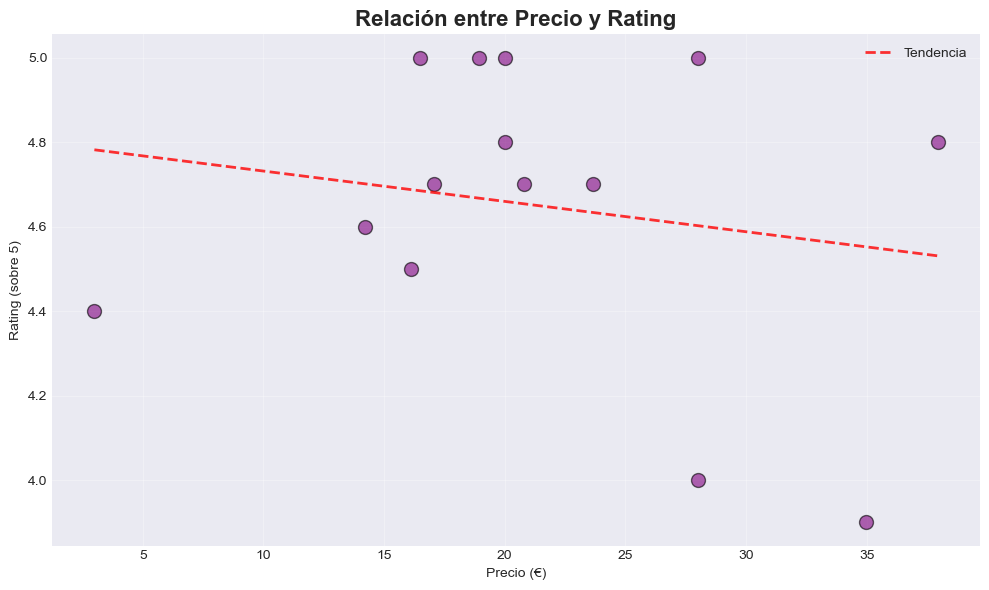


📊 Correlación Precio-Rating: -0.181
   → Correlación débil


In [51]:
# Relación Precio vs Rating
if df_precios['Precio_num'].notna().sum() > 0 and df_precios['Rating_num'].notna().sum() > 0:
    # Filtrar datos válidos
    datos_validos = df_precios[df_precios['Precio_num'].notna() & df_precios['Rating_num'].notna()]
    
    if len(datos_validos) > 0:
        plt.figure(figsize=(10, 6))
        plt.scatter(datos_validos['Precio_num'], datos_validos['Rating_num'], 
                   alpha=0.6, s=100, c='purple', edgecolors='black')
        
        # Línea de tendencia
        z = np.polyfit(datos_validos['Precio_num'], datos_validos['Rating_num'], 1)
        p = np.poly1d(z)
        plt.plot(datos_validos['Precio_num'].sort_values(), 
                p(datos_validos['Precio_num'].sort_values()), 
                "r--", alpha=0.8, linewidth=2, label='Tendencia')
        
        plt.title('Relación entre Precio y Rating', fontsize=16, fontweight='bold')
        plt.xlabel('Precio (€)')
        plt.ylabel('Rating (sobre 5)')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
        
        # Calcular correlación
        correlacion = datos_validos['Precio_num'].corr(datos_validos['Rating_num'])
        print(f"\n Correlación Precio-Rating: {correlacion:.3f}")
        if abs(correlacion) < 0.3:
            print("   → Correlación débil")
        elif abs(correlacion) < 0.7:
            print("   → Correlación moderada")
        else:
            print("   → Correlación fuerte")
    else:
        print(" No hay suficientes datos para análisis de correlación")
else:
    print(" No hay datos suficientes de precio y rating para análisis")

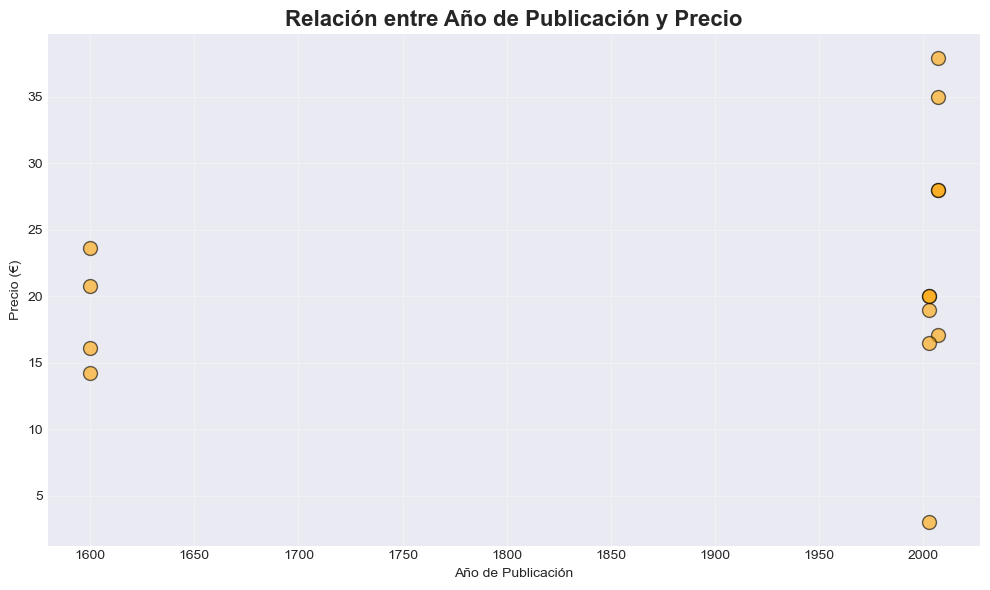


📊 Correlación Año-Precio: 0.204


In [53]:
# Relación Año de publicación vs Precio
# Fusionar datos de búsquedas con precios
df_completo = df_precios.merge(df_busquedas[['Busqueda', 'Año', 'Paginas']], 
                                on='Busqueda', how='left')

# Filtrar datos válidos
datos_año_precio = df_completo[df_completo['Año'].notna() & df_completo['Precio_num'].notna()]

if len(datos_año_precio) > 0:
    plt.figure(figsize=(10, 6))
    plt.scatter(datos_año_precio['Año'], datos_año_precio['Precio_num'], 
               alpha=0.6, s=100, c='orange', edgecolors='black')
    
    plt.title('Relación entre Año de Publicación y Precio', fontsize=16, fontweight='bold')
    plt.xlabel('Año de Publicación')
    plt.ylabel('Precio (€)')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    correlacion = datos_año_precio['Año'].corr(datos_año_precio['Precio_num'])
    print(f"\n Correlación Año-Precio: {correlacion:.3f}")
else:
    print(" No hay suficientes datos de año y precio")

In [55]:
# Matriz de correlación
if len(df_completo) > 0:
    # Seleccionar variables numéricas
    variables_numericas = df_completo[['Precio_num', 'Rating_num', 'Año', 'Paginas']].dropna()
    
    if len(variables_numericas) > 0:
        plt.figure(figsize=(10, 8))
        correlacion_matrix = variables_numericas.corr()
        
        sns.heatmap(correlacion_matrix, annot=True, cmap='coolwarm', center=0,
                   fmt='.2f', square=True, linewidths=1, cbar_kws={"shrink": 0.8})
        plt.title('Matriz de Correlación entre Variables', fontsize=16, fontweight='bold')
        plt.tight_layout()
        plt.show()
    else:
        print(" No hay suficientes datos numéricos para matriz de correlación")
else:
    print(" No se pudo crear dataset completo")

⚠️ No hay suficientes datos numéricos para matriz de correlación


## 8. Análisis Temporal

In [58]:
# Convertir fecha a datetime
df_busquedas['Fecha_dt'] = pd.to_datetime(df_busquedas['Fecha'])
df_busquedas['Hora'] = df_busquedas['Fecha_dt'].dt.hour
df_busquedas['Minuto'] = df_busquedas['Fecha_dt'].dt.minute

print(" ANÁLISIS TEMPORAL DE BÚSQUEDAS")
print("="*80)
print(f"Primera búsqueda: {df_busquedas['Fecha_dt'].min()}")
print(f"Última búsqueda: {df_busquedas['Fecha_dt'].max()}")
print(f"Duración total: {(df_busquedas['Fecha_dt'].max() - df_busquedas['Fecha_dt'].min())}")

📅 ANÁLISIS TEMPORAL DE BÚSQUEDAS
Primera búsqueda: 2026-01-28 18:53:32
Última búsqueda: 2026-01-28 18:54:08
Duración total: 0 days 00:00:36


## 9. Top Libros y Rankings

In [61]:
# Top libros más caros
print(" TOP 5 LIBROS MÁS CAROS")
print("="*80)
top_caros = df_precios.nlargest(5, 'Precio_num')[['Titulo', 'Precio', 'Busqueda', 'Tienda']]
display(top_caros)

# Top libros más baratos
print("\n TOP 5 LIBROS MÁS BARATOS")
print("="*80)
top_baratos = df_precios.nsmallest(5, 'Precio_num')[['Titulo', 'Precio', 'Busqueda', 'Tienda']]
display(top_baratos)

💎 TOP 5 LIBROS MÁS CAROS


,Titulo,Precio,Busqueda,Tienda
3,Harry Potter y la piedra filosofal (Harry Pott...,37.95€,Harry Potter,Amazon
0,Funidelia Disfraz Oficial Harry Potter - Gryff...,34.99€,Harry Potter,Amazon
1,PUREMIND Harry Potter Licencia Oficial Puzzle ...,27.99€,Harry Potter,Amazon
2,PUREMIND Harry Potter Puzzle 3D de Madera Ofic...,27.99€,Harry Potter,Amazon
14,Don Quijote de la Mancha (RAE),23.65€,Don Quijote,Amazon



💰 TOP 5 LIBROS MÁS BARATOS


,Titulo,Precio,Busqueda,Tienda
5,1984,2.99€,1984,Amazon
12,Don Quijote de la Mancha: con introducción de ...,14.20€,Don Quijote,Amazon
11,Don Quijote de la Mancha (edición especial en ...,16.10€,Don Quijote,Amazon
6,Cinta de casete vintage Best of 1984 Classic B...,16.49€,1984,Amazon
4,"Harry Potter Marcapáginas Originales Metal, Ma...",17.06€,Harry Potter,Amazon


In [63]:
# Libros mejor valorados
if df_precios['Rating_num'].notna().sum() > 0:
    print("\n TOP 5 LIBROS MEJOR VALORADOS")
    print("="*80)
    top_ratings = df_precios.nlargest(5, 'Rating_num')[['Titulo', 'Rating', 'Precio', 'Busqueda']]
    display(top_ratings)
else:
    print(" No hay datos de ratings suficientes")


⭐ TOP 5 LIBROS MEJOR VALORADOS


,Titulo,Rating,Precio,Busqueda
1,PUREMIND Harry Potter Licencia Oficial Puzzle ...,"5,0 de 5 estrellas",27.99€,Harry Potter
6,Cinta de casete vintage Best of 1984 Classic B...,"5,0 de 5 estrellas",16.49€,1984
8,Mujer Las Leyendas Nacen En Septiembre 1984 42...,"5,0 de 5 estrellas",19.99€,1984
9,Camiseta para Hombre Piezas Originales 1984 – ...,"5,0 de 5 estrellas",18.95€,1984
10,El caballero Don Quijote,"5,0 de 5 estrellas",No disponible,Don Quijote


## 10. Análisis de Libros Gratuitos

🆓 ANÁLISIS DE LIBROS GRATUITOS
Total de libros gratuitos: 5

Distribución por formato:
Formato
Digital (varios formatos)    5
Name: count, dtype: int64


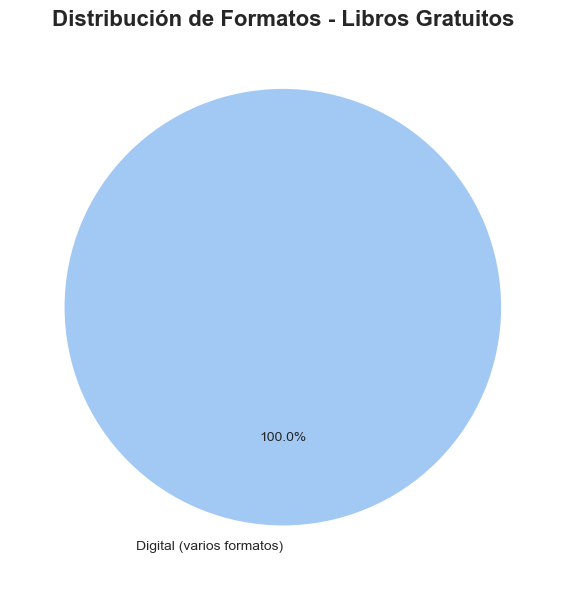


Ejemplos de libros gratuitos:


,Titulo,Precio,Formato,Fuente,Enlace
0,The Enchiridion by Epictetus (11057),GRATIS,Digital (varios formatos),Project Gutenberg,https://www.gutenberg.org/ebooks/45109
1,"Frankenstein; Or, The Modern Prometheus by Mar...",GRATIS,Digital (varios formatos),Project Gutenberg,https://www.gutenberg.org/ebooks/84
2,The Philippines: Past and Present (Volume 2 of...,GRATIS,Digital (varios formatos),Project Gutenberg,https://www.gutenberg.org/ebooks/41918
3,"Moby Dick; Or, The Whale by Herman Melville (4...",GRATIS,Digital (varios formatos),Project Gutenberg,https://www.gutenberg.org/ebooks/2701
4,Pride and Prejudice by Jane Austen (3420),GRATIS,Digital (varios formatos),Project Gutenberg,https://www.gutenberg.org/ebooks/1342


In [66]:
print(" ANÁLISIS DE LIBROS GRATUITOS")
print("="*80)
print(f"Total de libros gratuitos: {len(df_gratuitos)}")

if len(df_gratuitos) > 0:
    # Distribución por formato
    if 'Formato' in df_gratuitos.columns:
        formatos = df_gratuitos['Formato'].value_counts()
        print("\nDistribución por formato:")
        print(formatos)
        
        # Gráfico de pie
        plt.figure(figsize=(10, 6))
        formatos.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
        plt.title('Distribución de Formatos - Libros Gratuitos', fontsize=16, fontweight='bold')
        plt.ylabel('')
        plt.tight_layout()
        plt.show()
    
    # Mostrar algunos ejemplos
    print("\nEjemplos de libros gratuitos:")
    display(df_gratuitos.head(10))
else:
    print(" No hay datos de libros gratuitos")

## 11. Comparación de Fuentes de Datos

📊 RESUMEN DE FUENTES DE DATOS


,Numero,Nombre,Tecnica,Tipo_Datos,Notas
0,1,Open Library API,API REST,Información bibliográfica,Datos confiables
1,2,Google Books API,API REST,Detalles del libro,Datos estructurados
2,3,Amazon España,Web Scraping,Precios y disponibilidad,Requiere headers de navegador y rotación
3,4,Project Gutenberg,Web Scraping,Libros gratuitos,Dominio público


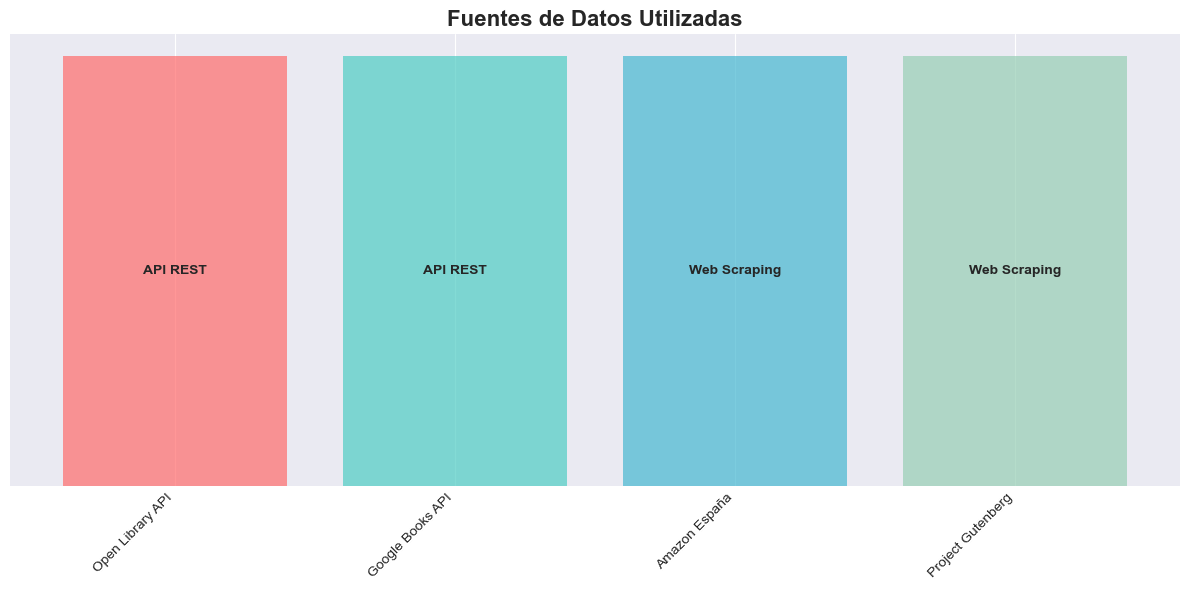

In [69]:
print(" RESUMEN DE FUENTES DE DATOS")
print("="*80)
display(df_fuentes)

# Visualización de fuentes
plt.figure(figsize=(12, 6))
fuentes_nombres = df_fuentes['Nombre']
x_pos = range(len(fuentes_nombres))

colores = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']
plt.bar(x_pos, [1]*len(fuentes_nombres), color=colores, alpha=0.7)
plt.xticks(x_pos, fuentes_nombres, rotation=45, ha='right')
plt.yticks([])
plt.title('Fuentes de Datos Utilizadas', fontsize=16, fontweight='bold')

# Añadir anotaciones
for i, (nombre, tecnica) in enumerate(zip(df_fuentes['Nombre'], df_fuentes['Tecnica'])):
    plt.text(i, 0.5, tecnica, ha='center', va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

## 12. Dashboard Resumen

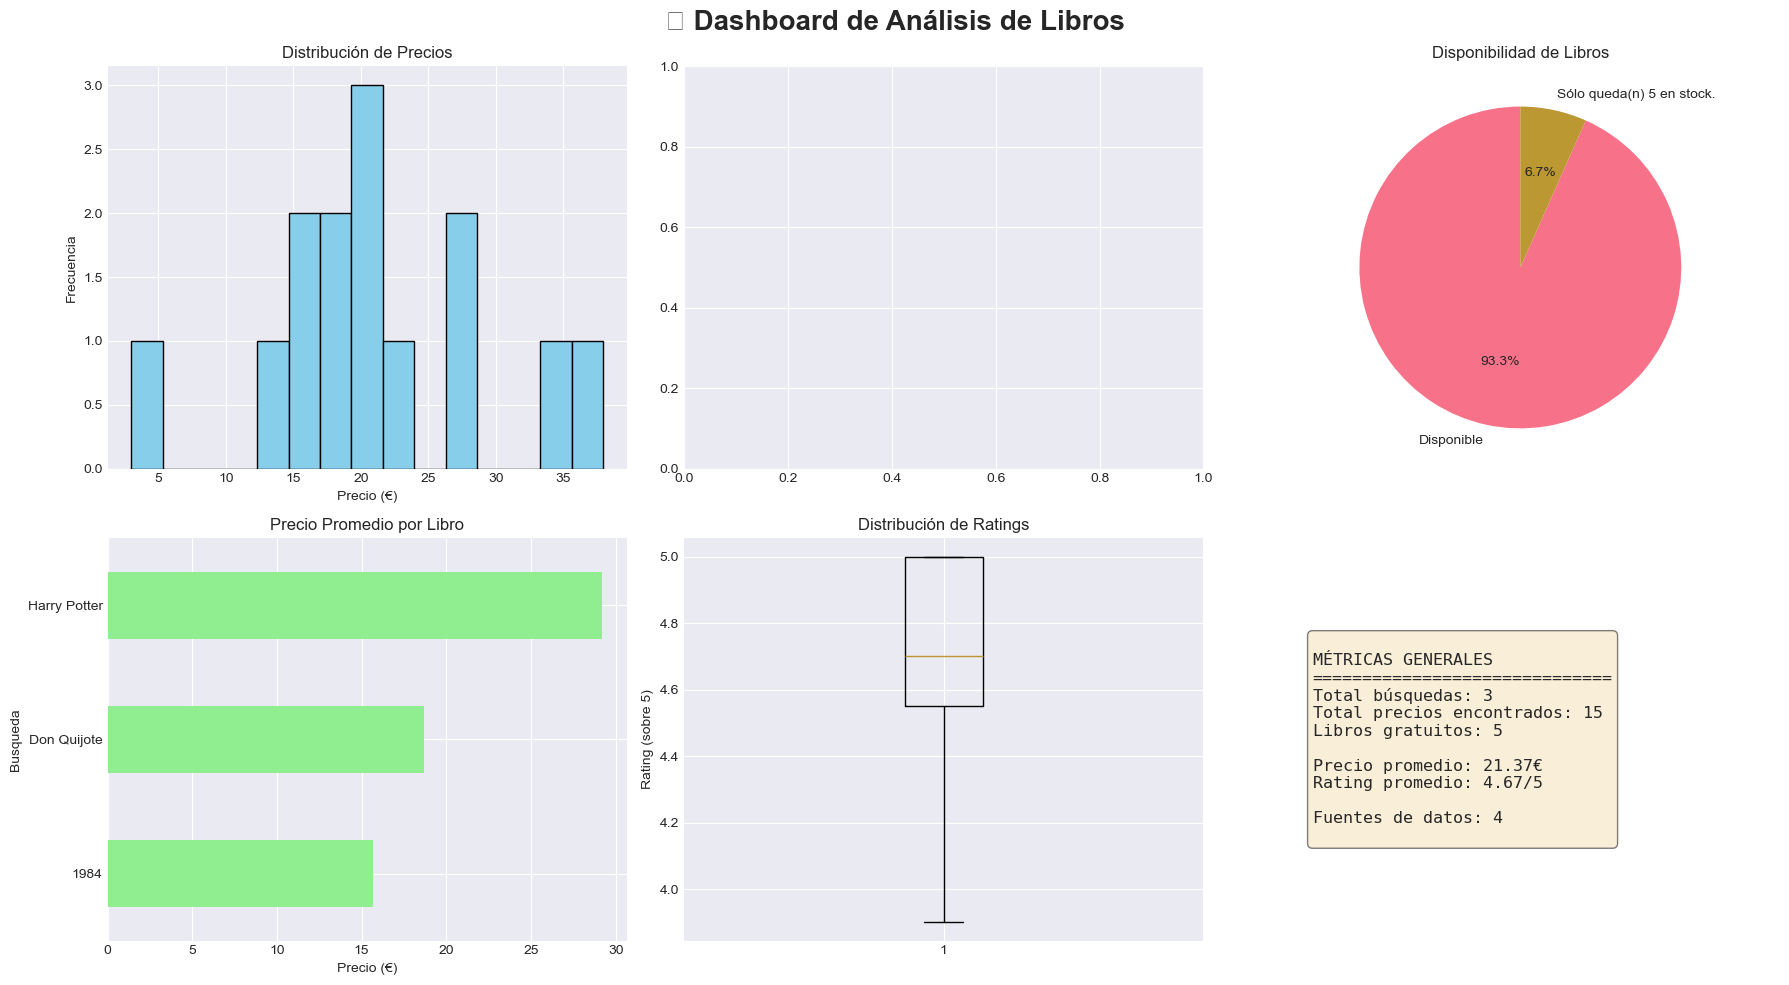

In [72]:
# Crear dashboard con métricas principales
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle(' Dashboard de Análisis de Libros', fontsize=20, fontweight='bold')

# 1. Distribución de precios
if df_precios['Precio_num'].notna().sum() > 0:
    axes[0, 0].hist(df_precios['Precio_num'].dropna(), bins=15, color='skyblue', edgecolor='black')
    axes[0, 0].set_title('Distribución de Precios')
    axes[0, 0].set_xlabel('Precio (€)')
    axes[0, 0].set_ylabel('Frecuencia')

# 2. Libros por idioma
if len(df_busquedas['Idioma'].value_counts()) > 0:
    df_busquedas['Idioma'].value_counts().head(5).plot(kind='bar', ax=axes[0, 1], color='lightcoral')
    axes[0, 1].set_title('Top 5 Idiomas')
    axes[0, 1].set_xlabel('Idioma')
    axes[0, 1].set_ylabel('Cantidad')
    axes[0, 1].tick_params(axis='x', rotation=45)

# 3. Disponibilidad
disponibilidad_data = df_precios['Disponibilidad'].value_counts()
axes[0, 2].pie(disponibilidad_data, labels=disponibilidad_data.index, autopct='%1.1f%%', startangle=90)
axes[0, 2].set_title('Disponibilidad de Libros')

# 4. Precios por búsqueda
if df_precios['Precio_num'].notna().sum() > 0:
    precios_promedio = df_precios.groupby('Busqueda')['Precio_num'].mean().sort_values()
    precios_promedio.plot(kind='barh', ax=axes[1, 0], color='lightgreen')
    axes[1, 0].set_title('Precio Promedio por Libro')
    axes[1, 0].set_xlabel('Precio (€)')

# 5. Ratings
if df_precios['Rating_num'].notna().sum() > 0:
    axes[1, 1].boxplot(df_precios['Rating_num'].dropna())
    axes[1, 1].set_title('Distribución de Ratings')
    axes[1, 1].set_ylabel('Rating (sobre 5)')

# 6. Métrica resumen
axes[1, 2].axis('off')
resumen_text = f"""
MÉTRICAS GENERALES
{'='*30}
Total búsquedas: {len(df_busquedas)}
Total precios encontrados: {len(df_precios)}
Libros gratuitos: {len(df_gratuitos)}

Precio promedio: {df_precios['Precio_num'].mean():.2f}€
Rating promedio: {df_precios['Rating_num'].mean():.2f}/5

Fuentes de datos: {len(df_fuentes)}
"""
axes[1, 2].text(0.1, 0.5, resumen_text, fontsize=12, verticalalignment='center', 
               family='monospace', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

## Conclusiones

In [75]:
print("\n" + "="*80)
print(" CONCLUSIONES DEL ANÁLISIS")
print("="*80)

# Calcular insights
if df_precios['Precio_num'].notna().sum() > 0:
    precio_max = df_precios['Precio_num'].max()
    precio_min = df_precios['Precio_num'].min()
    precio_promedio = df_precios['Precio_num'].mean()
    
    print(f"\n1. PRECIOS:")
    print(f"   • Rango de precios: {precio_min:.2f}€ - {precio_max:.2f}€")
    print(f"   • Diferencia máxima: {precio_max - precio_min:.2f}€")
    print(f"   • Precio medio: {precio_promedio:.2f}€")
    print(f"   • Ahorro potencial: {((precio_max - precio_min) / precio_max * 100):.1f}%")

if df_precios['Rating_num'].notna().sum() > 0:
    rating_promedio = df_precios['Rating_num'].mean()
    print(f"\n2. CALIDAD:")
    print(f"   • Rating promedio: {rating_promedio:.2f}/5")
    print(f"   • Libros bien valorados (>4.0): {len(df_precios[df_precios['Rating_num'] > 4.0])}")

print(f"\n3. DISPONIBILIDAD:")
total_productos = len(df_precios)
disponibles = len(df_precios[df_precios['Disponibilidad'] == 'Disponible'])
print(f"   • Productos disponibles: {disponibles}/{total_productos} ({disponibles/total_productos*100:.1f}%)")

print(f"\n4. FUENTES:")
print(f"   • APIs utilizadas: 2 (Open Library, Google Books)")
print(f"   • Web scraping: 2 sitios (Amazon, Gutenberg)")
print(f"   • Total de libros gratuitos encontrados: {len(df_gratuitos)}")

print("\n" + "="*80)
print(" Análisis completado exitosamente")
print("="*80)


📝 CONCLUSIONES DEL ANÁLISIS

1. PRECIOS:
   • Rango de precios: 2.99€ - 37.95€
   • Diferencia máxima: 34.96€
   • Precio medio: 21.37€
   • Ahorro potencial: 92.1%

2. CALIDAD:
   • Rating promedio: 4.67/5
   • Libros bien valorados (>4.0): 13

3. DISPONIBILIDAD:
   • Productos disponibles: 14/15 (93.3%)

4. FUENTES:
   • APIs utilizadas: 2 (Open Library, Google Books)
   • Web scraping: 2 sitios (Amazon, Gutenberg)
   • Total de libros gratuitos encontrados: 5

✅ Análisis completado exitosamente


## 14. Exportar Resultados del Análisis

In [78]:
# Crear DataFrame con estadísticas principales
estadisticas = pd.DataFrame({
    'Métrica': [
        'Total Búsquedas',
        'Total Precios',
        'Libros Gratuitos',
        'Precio Promedio (€)',
        'Precio Mínimo (€)',
        'Precio Máximo (€)',
        'Rating Promedio'
    ],
    'Valor': [
        len(df_busquedas),
        len(df_precios),
        len(df_gratuitos),
        f"{df_precios['Precio_num'].mean():.2f}" if df_precios['Precio_num'].notna().sum() > 0 else 'N/A',
        f"{df_precios['Precio_num'].min():.2f}" if df_precios['Precio_num'].notna().sum() > 0 else 'N/A',
        f"{df_precios['Precio_num'].max():.2f}" if df_precios['Precio_num'].notna().sum() > 0 else 'N/A',
        f"{df_precios['Rating_num'].mean():.2f}" if df_precios['Rating_num'].notna().sum() > 0 else 'N/A'
    ]
})

# Guardar en CSV
estadisticas.to_csv('estadisticas_analisis.csv', index=False, encoding='utf-8')
print(" Estadísticas guardadas en 'estadisticas_analisis.csv'")

display(estadisticas)

✅ Estadísticas guardadas en 'estadisticas_analisis.csv'


,Métrica,Valor
0,Total Búsquedas,3
1,Total Precios,15
2,Libros Gratuitos,5
3,Precio Promedio (€),21.37
4,Precio Mínimo (€),2.99
5,Precio Máximo (€),37.95
6,Rating Promedio,4.67
